# Load packages and read in the dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline  

In [2]:
#Reading in the dataset
df_kingcounty = pd.read_csv("kingcounty.csv")

# Stakeholder requirements & assumptions (=Hypotheses)
## Requirements (What I think, the seller wants)
The seller wants to...
   * maximize her sales profit
   * sell historical houses from before 1945 only 
   * know the best time to sell
   * understand if there is a difference between the prices of historical and modern houses
   * **NOT DONE YET**
   * know which features maximize sales profit of historical houses

## Assumptions on the data = Hypotheses
   * The time of selling influences the price. 
   * There is a difference between the prices of historical and modern house prices.
   * **NOT DONE YET**
   * There are some features that make some historical houses more expensive than others (e.g no. of rooms, age of house, renovated?, waterview?) Just take some features. Check the correlations
   * If T renevates the house, she gets a higher price. compare colums. 

## Exploring the dataset

In [3]:
#Show number of rows and colums
df_kingcounty.shape

(21597, 21)

In [4]:
#Show top 5-rows and all colums
df_kingcounty.head() # First 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Show column names
df_kingcounty.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Rename colums to more understandable names 
df_kingcounty.rename(columns={'date': 'sales_date', 
                            'view': 'viewed', 
                            'condition': 'overall_condition', 
                            'grade': 'overall_grade'}, inplace=True)

#Show column names
df_kingcounty.columns

Index(['id', 'sales_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'viewed', 'overall_condition',
       'overall_grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [7]:
#Look at the data type for each column and the number of null values
df_kingcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   sales_date         21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   waterfront         19221 non-null  float64
 9   viewed             21534 non-null  float64
 10  overall_condition  21597 non-null  int64  
 11  overall_grade      21597 non-null  int64  
 12  sqft_above         21597 non-null  int64  
 13  sqft_basement      21597 non-null  object 
 14  yr_built           21597 non-null  int64  
 15  yr_renovated       17755 non-null  float64
 16  zipcode            215

In [8]:
#Summarize the data
df_kingcounty.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,overall_condition,overall_grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#Conversion of sales dates to month and years
pd.to_datetime(df_kingcounty["sales_date"])
df_kingcounty["sales_year"] = pd.DatetimeIndex(df_kingcounty["sales_date"]).year
df_kingcounty["sales_month"] = pd.DatetimeIndex(df_kingcounty["sales_date"]).month

df_kingcounty.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


In [10]:
#Remove outliers and funny values
#Find NAN values 
df_kingcounty.isnull().sum().sort_values()

id                      0
sqft_lot15              0
sqft_living15           0
long                    0
lat                     0
zipcode                 0
yr_built                0
sqft_basement           0
sqft_above              0
sales_year              0
overall_grade           0
floors                  0
sqft_lot                0
sqft_living             0
bathrooms               0
bedrooms                0
price                   0
sales_date              0
overall_condition       0
sales_month             0
viewed                 63
waterfront           2376
yr_renovated         3842
dtype: int64

# Exploring the dataset with regard to the assumptions

## Variables needed to investigate seller's questions

**Dependent variable**
* price for historical houses built before 1945
* price for modern houses built in 1945 or later

**Explanatory variable(s)**
* sales date (year and month)

**Further variable(s) needed for calculation of main variables**
* year built

In [11]:
#Create a dataset that contains only historical houses built before 1945
df_hist = df_kingcounty[df_kingcounty['yr_built'] < 1945]
df_hist.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2
11,9212900260,5/27/2014,468000.0,2,1.0,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,2014,5
12,114101516,5/28/2014,310000.0,3,1.0,1430,19901,1.5,0.0,0.0,...,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697,2014,5
14,1175000570,3/12/2015,530000.0,5,2.0,1810,4850,1.5,0.0,0.0,...,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850,2015,3
17,6865200140,5/29/2014,485000.0,4,1.0,1600,4300,1.5,0.0,0.0,...,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300,2014,5


In [12]:
#Create a dataset that contains only modern houses built 1945 or after
df_modern = df_kingcounty[df_kingcounty['yr_built'] >= 1945]
df_modern.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,5


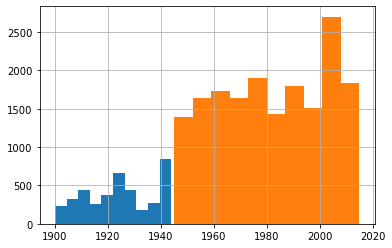

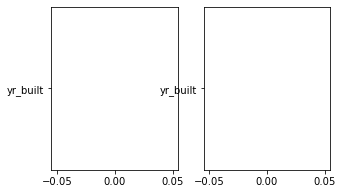

In [13]:
#Make histograms to investigate the number of houses in general
df_hist['yr_built'].hist()
df_modern['yr_built'].hist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot('yr_built')
axes[1].plot('yr_built');

#CONCLUSIONS from histograms
#There are more modern houses in the data set than historical houses. 
#After World War II and before the financial crisis many new houses were built. 
#The distribution of both data sets appears to be non-nornmal -> Take log. 

#BAD
#No axis description
#No title
#Some strange diagrams below

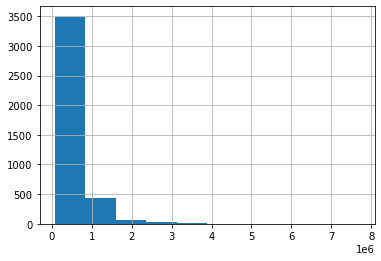

In [14]:
#Make histograms to investigate the prices of historical and modern houses
df_hist['price'].hist();

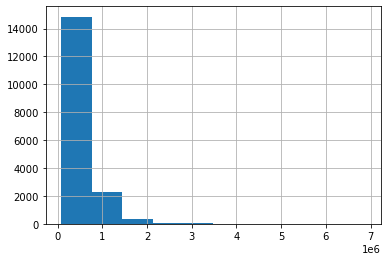

In [15]:
df_modern['price'].hist();

In [16]:
#CONCLUSIONS from histograms
#The price distribution of both data sets appears to be non-nornmal -> Take log. 

#BAD
#I am unable to join histograms. 

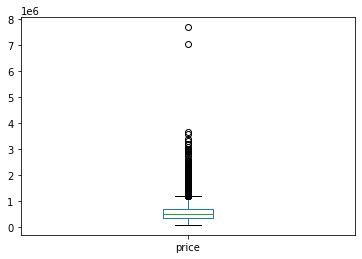

In [17]:
#Before takint the log I check on outliers in the price using boxplots
df_hist['price'].plot(kind='box');

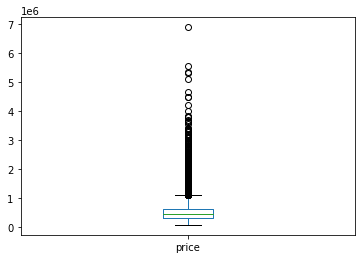

In [18]:
df_modern['price'].plot(kind='box');

In [19]:
#CONCLUSION
#Strong outliers are present in both data sets. -> delete outliers

In [20]:
#Delete outliers (NOT VERY SCIENTIFIC USING A GRAPHICAL METHOD)
df_hist_cleaned = df_hist[df_hist['price'] < 4.000000e+06]
df_modern_cleaned = df_modern[df_modern['price'] < 4.000000e+06]

#Check if it worked by using 'describe' & 'boxplots' again

In [21]:
#Taking the logarithms of the outlier-cleaned data to normalize the distributions
df_hist_cleaned['lnprice'] = np.log(df_hist_cleaned['price'])
df_modern_cleaned['lnprice'] = np.log(df_modern_cleaned['price'])

<ipython-input-21-8f8c4c9d0165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_cleaned['lnprice'] = np.log(df_hist_cleaned['price'])
<ipython-input-21-8f8c4c9d0165>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modern_cleaned['lnprice'] = np.log(df_modern_cleaned['price'])


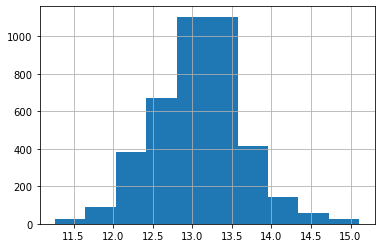

In [22]:
#Taking a look at the price histograms again after taking the logarithm to check on the distribution
df_hist_cleaned['lnprice'].hist();

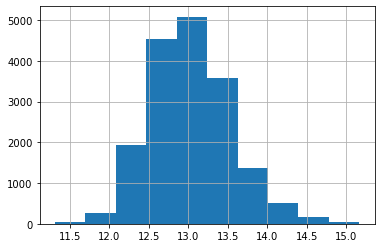

In [23]:
df_modern_cleaned['lnprice'].hist();

In [24]:
#CONCLUSION
#Distribution of prices looks more normal in both data sets after taking the logarithm

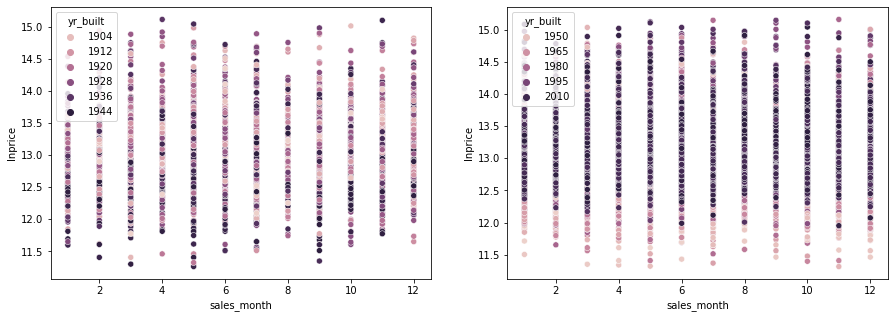

In [25]:
#Create scatterplots to see in which month historical and modern houses reached highest prices &
#to check whether the prices of historical and modern houses differ

f, axes = plt.subplots(1,2, figsize=(15,5), squeeze=False)
sns.scatterplot(data=df_hist_cleaned, x="sales_month", y="lnprice", hue="yr_built", ax=axes[0][0])
sns.scatterplot(data=df_modern_cleaned, x="sales_month", y="lnprice", hue="yr_built", ax=axes[0][1]);

In [26]:
#CONCLUSION
# With the bare eye no "higest sales price" is visible in either data set
# The same applies to differences between historical and modern house prices. 

In [27]:
#Repeat the analyis using median values
df_hist_cleaned_median = df_hist_cleaned.groupby('sales_month')['lnprice'].median()
df_modern_cleaned_median = df_modern_cleaned.groupby('sales_month')['lnprice'].median()

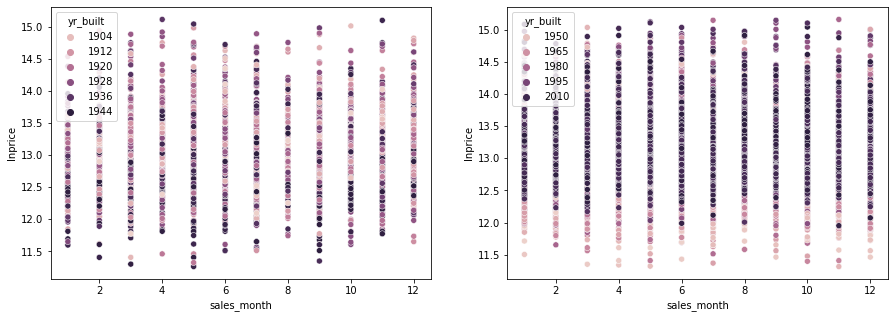

In [28]:
#Create scatterplots with median price per month
f, axes = plt.subplots(1,2, figsize=(15,5), squeeze=False)
sns.scatterplot(data=df_hist_cleaned, x="sales_month", y="lnprice", hue="yr_built", ax=axes[0][0])
sns.scatterplot(data=df_modern_cleaned, x="sales_month", y="lnprice", hue="yr_built", ax=axes[0][1]);

In [29]:
#CONCLUSION
#Same conclusion as above - no pattern visible with naked eye
#Regarding historical houses, price differences between sales month appear to be rather "small" and driven by outliers.
# -> Remove further outliers and repeat analysis. Also look at numbers, not just graphs

#Better do a t-test to check whether the price distribution of historical an modern houses differ

In [30]:
#Looking at the median per sales month for historical and modern houses
print(df_hist_cleaned_median, df_modern_cleaned_median)

sales_month
1     13.024745
2     13.027992
3     13.132314
4     13.157731
5     13.119358
6     13.122363
7     13.157729
8     13.021437
9     13.076319
10    13.091904
11    13.061551
12    13.085699
Name: lnprice, dtype: float64 sales_month
1     12.983101
2     12.959844
3     13.009754
4     13.057291
5     13.017003
6     13.033532
7     13.028053
8     12.994530
9     12.997933
10    12.992255
11    12.966411
12    12.959844
Name: lnprice, dtype: float64


In [38]:
#CONCLUSION of looking at median per sales month
#Historical houses reach higehst prices in median in April & in Juli. 
#Modern houses reach highest prices in median in April & June. 
#Median price differences between sales month are generally small
#Median price differences between historical and modern houses are roughly about 1 Mio. $.  

# Use of multiple linear regression to explore the data 

In [35]:
smf.ols(formula='lnprice ~ sales_month', data=df_hist_cleaned).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04079
Date:                Thu, 15 Oct 2020   Prob (F-statistic):              0.840
Time:                        11:38:58   Log-Likelihood:                -3364.2
No. Observations:                4020   AIC:                             6732.
Df Residuals:                    4018   BIC:                             6745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0757      0.021    625.218      0.000      13.035      13.117
sales_month     0.0006      0.003      0.202      0.840      -0.005       0.006
==============================================================================
Omnibus:                       34.671   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.372
Skew:                           0.102   Prob(JB):                     3.13e-11
Kurtosis:                       3.498   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#CONCLUSION
#The impact of the sales month is insignficiant for historical houses. 

In [36]:
smf.ols(formula='lnprice ~ sales_month', data=df_modern_cleaned).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.746
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0165
Time:                        11:39:01   Log-Likelihood:                -13259.
No. Observations:               17565   AIC:                         2.652e+04
Df Residuals:                   17563   BIC:                         2.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0589      0.009   1445.010      0.000      13.041      13.077
sales_month    -0.0030      0.001     -2.397      0.017      -0.005      -0.001
==============================================================================
Omnibus:                      701.553   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              828.610
Skew:                           0.465   Prob(JB):                    1.17e-180
Kurtosis:                       3.515   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#CONCLUSION
#The impact of the sales month is significant for modern houses. 

# Recommendations for steakholder
* Dont trust these numbers & calculations!
* The sales month does not appear to be a very important factor for the sales price of a historical house
* Use further controls in dataset (e.g. house size) to get more insights on features impacting prices
* Keep in mind that the current situation (Corona, trade war etc.) may impact the house prices in a special and extreme way, which cannot be foreseen precisely from historical/past data. 

# Future work
* Answer all questions of stakeholder
* Learn how to write code in Python an make proper graphs
* Delete missings & strange values
* Map with longditude, latitude and prices for historical and modern houses
* Inclusion of further controls into the model, e.g. inflation, general economic shocks etc. 
* Dont use OLS, but advanced models (e.g. time-series models) 
* Control for endogeneity problems (particularly omitted variables bias & multicolinearity) 